# Pathfinder tests

The goal of this module is to test the functionality of the pathfinder modules using the pre-saved data from the fullscan pathfinder.

In [29]:
import sys
sys.path.append('..\\')
# print(sys.path)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import json
from scipy.interpolate import griddata
from scipy.interpolate import LinearNDInterpolator

%load_ext autoreload
%autoreload 2

from Pathfinders import *


### Unload the data from a particular scan
This should only include data from a Fullscan module

In [40]:
path = os.path.abspath('..\\')
test_no = 5
# current_file = r"\Debugging Scripts\Scans\test_%s.json" % test_no
current_file = r"\Scans\test_%s.json" % test_no

debug_mode = False

### JSON Unpacking
Using the above file number and path, the scan data is unpacked from the corresponding JSON file. Unpacking the data can take around ~15 seconds depending on the length of the file, so a #TODO item is to create code for running a pathfinder directly off a math equation.

In [54]:
with open(path + current_file, 'r') as infile:
    json_data = json.load(infile)

r_o_m = json_data["range of motion"]
resolution = json_data["resolution"]
point_mags = json_data["points"]
scan_max = json_data["max_point"]

r = dict()
active_rom = []
for DoF in r_o_m:
    r[DoF] = (r_o_m[DoF][1] - r_o_m[DoF][0]) / 2
    if r[DoF] != 0.0:
        active_rom.append(DoF)

indices = {'X': (0,0), 'Y': (0,1), 'Z': (0,2), 'Rx': (1,0), 'Ry': (1,1), 'Rz': (1,2)}
points = np.array([[p[0][indices[a][0]][indices[a][1]] for a in active_rom] for p in point_mags])
mags = np.array([p[1] for p in point_mags])

linInter = LinearNDInterpolator(points, mags)

r = dict()
for DoF in r_o_m:
    r[DoF] = (r_o_m[DoF][1] - r_o_m[DoF][0]) / 2

p_dict = dict()
for p in point_mags:
    p_dict[(tuple(p[0][0]),tuple(p[0][1]))] = p[1]

if debug_mode:
    print(f"Active range of motion: {active_rom}")
    print(point_mags[0])
    print(type(point_mags))
    print(r_o_m)
    print(np.shape(points))
    print(r)

In [67]:
scanner = Discrete_degree(r['Z'], r['Rx'], r['Ry'])
# scanner = DivisionDiscreteDegree(4, r['Z'], r['Rx'], r['Ry'], cutoff_mag=50)

print(scanner.range_of_motion)

p = scanner.next()
i = 0
 
while p != 1 and i < 10000:
    i += 1

    request = np.array([p[indices[a][0]][indices[a][1]] for a in active_rom])
    mag = linInter(request)
    # if math.isnan(mag):
    #     if debug_mode:
    #         print(request)
    #     mag = [0]

    scanner.newMag((p, mag[0]), True)
    # print(p)
    p = scanner.next()

# file_itr = 0
# while os.path.exists(path + "\\Debugging Scripts\\test_%s_%s_draft.json" % (test_no, file_itr)):
    # file_itr += 1

# output_file = "\\Debugging Scripts\\test_%s_%s_draft.json" % (test_no, file_itr)
# scanner.save_points(path + output_file)

if debug_mode:
    print(f"Number of points to solve: {i}")
    # print(path + output_file)

{'X': [0, 0], 'Y': [0, 0], 'Z': [-10.0, 6.0], 'Rx': [-50.0, 50.0], 'Ry': [-50.0, 50.0], 'Rz': [0, 0]}
-2.0
0.0
0.0
-1.0
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0


In [68]:
# with open(path + output_file, 'r') as infile:
#     json_data = json.load(infile)

# r_o_m = json_data["range of motion"]
r_o_m = scanner.range_of_motion
# # divisions = json_data["divisions"]
divisions = scanner.divisions
# point_mags_2 = json_data["points"]
point_mags_2 = scanner.points
# search_max = json_data["max_point"]
search_max = scanner.max_point

print(len(point_mags_2))

10000


In [69]:
Zs = []
Rxs = []
Rys = []
mags = []

for p in point_mags:
    Zs.append(p[0][0][2])
    Rxs.append(p[0][1][0])
    Rys.append(p[0][1][1])
    mags.append(p[1])

Zs1 = []
Rxs1 = []
Rys1 = []

for p in point_mags_2:
    Zs1.append(p[0][0][2])
    Rxs1.append(p[0][1][0])
    Rys1.append(p[0][1][1])

C:\Users\ander\AppData\Local\Temp/ipykernel_17272/446852896.py:3: MatplotlibDeprecationWarning: The 'alpha' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(fig, pad=0.13,alpha=1)


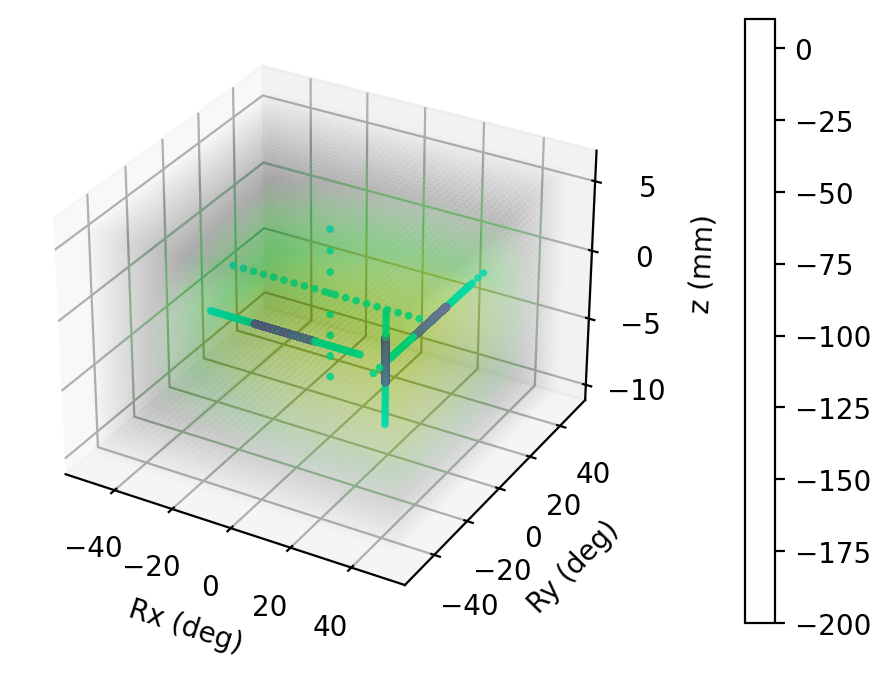

In [70]:
ax = plt.axes(projection='3d')
fig = ax.scatter(Rxs, Rys, Zs, c=mags, cmap='viridis', alpha=0.005, linewidth=0.05)
plt.colorbar(fig, pad=0.13,alpha=1)

# fig = ax.scatter(Rxs1, Rys1, Zs1, c=range(len(Zs1)), cmap='binary', alpha=0.8, linewidth=0.8, s=4)
fig = ax.scatter(Rxs1, Rys1, Zs1, c=range(len(Zs1)), cmap='cool', alpha=0.8, linewidth=0.8, s=4)

ax.set_xlabel("Rx (deg)")
ax.set_ylabel("Ry (deg)")
ax.set_zlabel("z (mm)")
plt.rcParams['figure.dpi'] = 200

# plt.savefig("fullscan_render.jpg", dpi=400)
plt.show()
# plt.axes(projection = "3d")
# plt.scatter(Rxs, Rys, Zs, c=mags, cmap='viridis', alpha=0.8, linewidth=0.5)


In [46]:
a = point_mags_2[0][0]
distance = 0

for i in range(1, len(point_mags_2)):
    b = point_mags_2[i][0]
    t = 0
    for j in range(3):
        t += (a[0][j] - b[0][j])**2
        t += (a[1][j] - b[1][j])**2

    distance += t**0.5
    a = b

for j in range(3):
    t += (scan_max[0][0][j] - search_max[0][0][j])**2
    t += (scan_max[0][1][j] - search_max[0][1][j])**2


print("Pathfinder evalutation: ")
print(f"\tTotal search-space distance traveled: {distance}")
print(f"\tScan max value: {scan_max}")
print(f"\tSearch max value: {search_max}")
print(f"\tDistance from target to found value: {t**0.5}")

Pathfinder evalutation: 
	Total search-space distance traveled: 4053.352505106663
	Scan max value: [[[0.0, 0.0, -1.5], [32.0, -28.0, 0.0]], 10]
	Search max value: [[[0, 0, -0.5047619047619042], [37.86012676462116, -25.925925925925924, 0]], 10.0]
	Distance from target to found value: 6.295503812688445
